## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization, and unit vector normalization in Python
* Identify appropriate normalization and scaling techniques for a given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [12]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

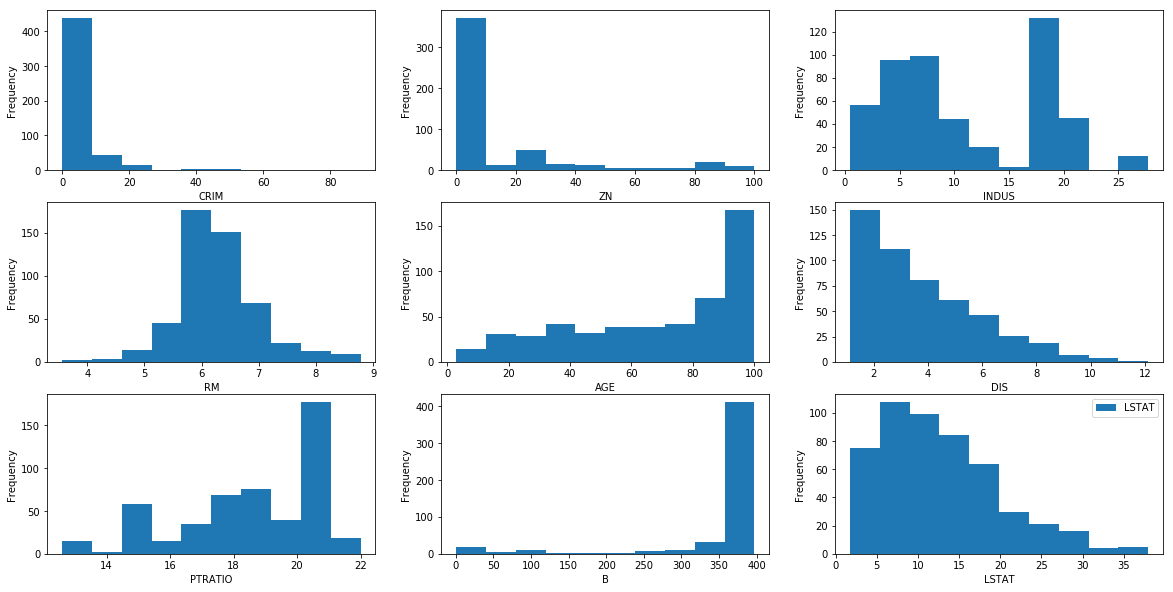

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
# boston_features.columns
boston_features_cont = boston_features.iloc[:,:10]
cols = list(boston_features_cont.columns)
cols.remove('CHAS')
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for idx, col in enumerate(cols):
    boston_features_cont[col].plot(kind='hist', ax=axes[idx//3][idx%3], label=col)
    ax=axes[idx//3][idx%3].set_xlabel(col)
plt.legend()
plt.show()

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

In [33]:
print(cols)

['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']


In [44]:
import numpy as np
boston_log = pd.DataFrame([])
for col in cols:
    if col != 'RM' and col != 'ZN':
        print(col)
        boston_log[col] = np.log(boston_features_cont[col])

CRIM
INDUS
AGE
DIS
PTRATIO
B
LSTAT


/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


No handles with labels found to put in legend.


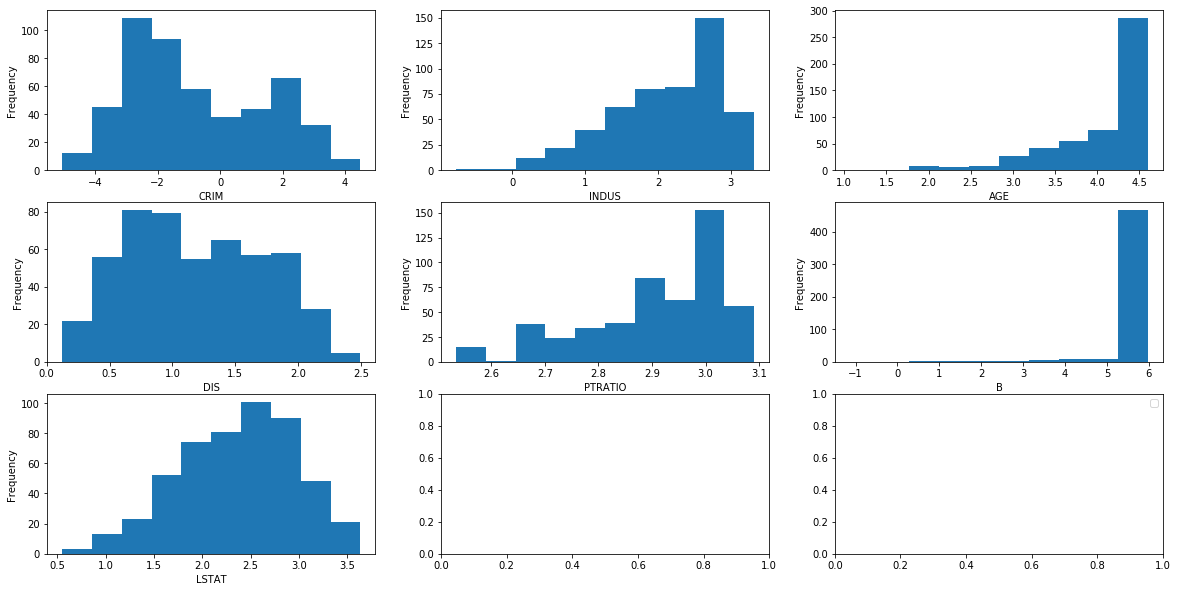

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
for idx, col in enumerate(list(boston_log.columns)):
    boston_features_cont[col].plot(kind='hist', ax=axes[idx//3][idx%3], label=col)
    axes[idx//3][idx%3].set_xlabel(col)
plt.legend()
plt.show()

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [36]:
# Your code here
boston_features_cont['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

In [48]:
boston_features_cont.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [42]:
features_final = pd.DataFrame([])

logcrime = boston_log['CRIM']
logindus = boston_log['INDUS']
logdis = boston_log['DIS']
logptratio = boston_log['PTRATIO']
loglstat = boston_log['LSTAT']
age = boston_features_cont['AGE']
b = boston_features_cont['B']
rm = boston_features_cont['RM']

features_final['CRIM'] = logcrime
        
features_final['log_crime'] = boston_log['CRIM'] - np.boston_log['CRIM']

boston_discrete = boston_features.iloc[:, 10:]
boston_cont = boston_features_cont
features_final = pd.concat([boston_discrete, boston_cont], axis=1)

## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` DataFrame.